<a href="https://colab.research.google.com/github/prantoran/ai-prac/blob/master/py_torch/torchnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
print("DATA_PATH:", DATA_PATH)
PATH = DATA_PATH / "mnist"
print("PATH:", PATH)
PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/master/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

DATA_PATH: data
PATH: data/mnist


In [2]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

(50000, 784)


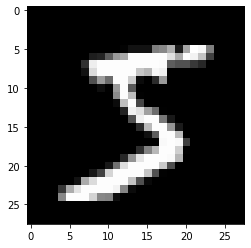

In [3]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

In [4]:
import torch

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n, c = x_train.shape
# x_train, x_train.shape, y_train.min(), y_train.max()
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


In [14]:
import math

weights = torch.randn(784, 10) / math.sqrt(784) # Xaview initialization
# by multiplying with 1/sqrt(n)
# shape: torch.Size([784, 10])

# records all operations to be used during backpropagation
# suffix _ indicates in-place operation
# turned on after initialization above so that initialization not recorded
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)
# bias shape: torch.Size([10])

In [18]:
# activation function
def log_softmax(x):
    # x: torch.Tensor
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    # xb expected to be type torch.Tensor
    return log_softmax(xb @ weights + bias)

In [19]:

# @ dot product operation
# 1 forward pass: calling our func on 1 batch of data (in this case, 64 images)

bs = 64  # batch size

xb = x_train[0:bs]  # a mini-batch from x
# xb: torch.Tensor

preds = model(xb)  # predictions
preds[0], preds.shape
print(preds[0], preds.shape)


# tensor contains not only the tensor values, but also a gradient function. We’ll use this later to do backprop.

tensor([-2.1648, -2.6249, -2.4690, -1.8716, -2.5731, -2.1278, -2.4795, -2.0327,
        -3.2633, -2.0729], grad_fn=<SelectBackward>) torch.Size([64, 10])


In [23]:
# loss func: negative log likelihood
def nll(input, target):
  # target.shape: torch.Size([64]) target.shape[0]: 64
  # type(input): <class 'torch.Tensor'>
  # type(target): <class 'torch.Tensor'>
  print("input.shape:", input.shape)
  print("input:", input, "type(input):", type(input))
  print("target:", target, "type(target):", type(target))
  print("target.shape:", target.shape, "target.shape[0]:", target.shape[0])
  print("range(target.shape[0]):", range(target.shape[0]))
  print("input[range(target.shape[0]), target]:", input[range(target.shape[0]), target])
  print("input[range(target.shape[0]), target].mean():", input[range(target.shape[0]), target].mean())
  print("-input[range(target.shape[0]), target].mean():", -input[range(target.shape[0]), target].mean())
  return -input[range(target.shape[0]), target].mean()

loss_func = nll

In [24]:
yb = y_train[0:bs]
print("yb:", yb)
print(loss_func(preds, yb))

yb: tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0])
input.shape: torch.Size([64, 10])
input: tensor([[-2.1648, -2.6249, -2.4690, -1.8716, -2.5731, -2.1278, -2.4795, -2.0327,
         -3.2633, -2.0729],
        [-2.3754, -2.4621, -2.3329, -1.7422, -2.6526, -2.3424, -2.2176, -2.0346,
         -2.5997, -2.6712],
        [-2.2839, -2.6491, -2.2029, -2.2858, -2.3198, -2.6653, -2.4234, -2.0229,
         -2.2471, -2.1141],
        [-2.0285, -2.4276, -2.3282, -1.7153, -2.5039, -2.5031, -2.2477, -2.6537,
         -2.5759, -2.4406],
        [-2.2253, -2.3262, -2.7916, -2.0206, -2.7942, -2.1510, -2.1009, -2.0351,
         -2.8049, -2.2134],
        [-2.3759, -2.3850, -2.2575, -2.2511, -2.5323, -2.4760, -2.5784, -2.1874,
         -2.3531, -1.8429],
        [-2.3879, -2.2660, -2.2197, -2.0632, -2.8681, -2.5357, -2.3686, -2.1690,
   